In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error as mape, r2_score

from collections import defaultdict
import torch
import matplotlib.pyplot as plt

torch.use_deterministic_algorithms(True)

from google.colab import drive
drive.mount('/content/drive')
from datetime import datetime


Mounted at /content/drive


In [2]:
train = pd.read_csv('drive/MyDrive/hackaton_sfo/train.csv')#.iloc[104:]
test = pd.read_csv('drive/MyDrive/hackaton_sfo/test.csv')

In [3]:
train[train.select_dtypes('object').columns] = train.loc[:, train.select_dtypes('object').columns].replace(' ', 0).astype('float')
test[test.select_dtypes('object').columns] = test.loc[:, test.select_dtypes('object').columns].replace(' ', 0).astype('float')

In [4]:
timestamps = train['week_beg'].values*100
test_timestamps = [timestamps[-1] + 604800 * i for i in range(1, 30)]

In [5]:
weeks = [datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in timestamps]
test_weeks = [datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in test_timestamps]

In [6]:
pd.set_option('display.max_columns', 250)

In [7]:
# train = train.drop(columns=['week_beg'])
train.insert(0, 'week_number', train.index.values)
train.shape

(244, 149)

([<matplotlib.axis.XTick at 0x79fb434cfcd0>,
 [Text(0.0, 0, '2018-12-31'),
  Text(10.0, 0, '2019-03-11'),
  Text(20.0, 0, '2019-05-20'),
  Text(30.0, 0, '2019-07-29'),
  Text(40.0, 0, '2019-10-07'),
  Text(50.0, 0, '2019-12-16'),
  Text(60.0, 0, '2020-02-24'),
  Text(70.0, 0, '2020-05-04'),
  Text(80.0, 0, '2020-07-13'),
  Text(90.0, 0, '2020-09-21'),
  Text(100.0, 0, '2020-11-30'),
  Text(110.0, 0, '2021-02-08'),
  Text(120.0, 0, '2021-04-19'),
  Text(130.0, 0, '2021-06-28'),
  Text(140.0, 0, '2021-09-06'),
  Text(150.0, 0, '2021-11-15'),
  Text(160.0, 0, '2022-01-24'),
  Text(170.0, 0, '2022-04-04'),
  Text(180.0, 0, '2022-06-13'),
  Text(190.0, 0, '2022-08-22'),
  Text(200.0, 0, '2022-10-31'),
  Text(210.0, 0, '2023-01-09'),
  Text(220.0, 0, '2023-03-20'),
  Text(230.0, 0, '2023-05-29'),
  Text(240.0, 0, '2023-08-07')])

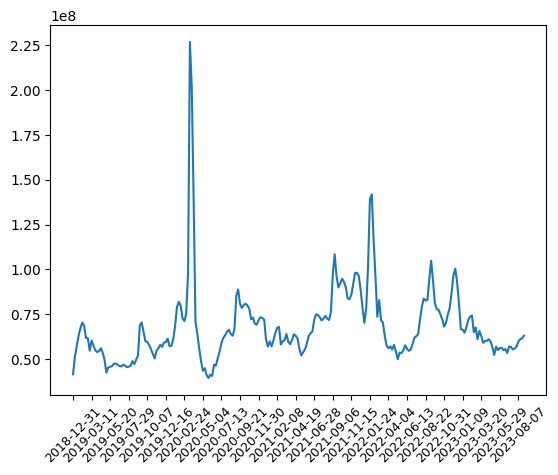

In [8]:
plt.plot(weeks, train['revenue'])
plt.xticks(weeks[::10] , fontsize=9, rotation=45)

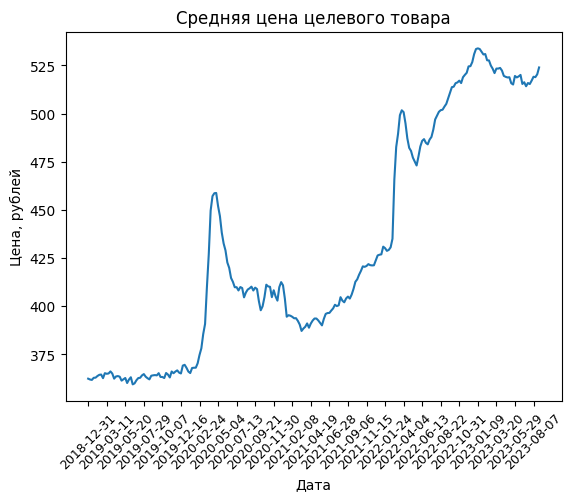

In [9]:
train['average_price'] = train['revenue'] / train['quantity']
plt.plot(weeks, train['average_price'])
plt.xticks(weeks[::10] , fontsize=9, rotation=45)
plt.title('Средняя цена целевого товара')
plt.xlabel('Дата')
plt.ylabel('Цена, рублей')
plt.show();

In [10]:
def get_season(x):
    if x in [12, 1, 2]:
        return 0 # 'winter'
    elif x in [3, 4, 5]:
        return 1 # 'spring'
    elif x in [6, 7, 8]:
        return 2 # 'summer'
    elif x in [9, 10, 11]:
        return 4 # 'autumn'

train['season'] = train['month'].apply(get_season)

colors = ['blue', 'green', 'red', 'orange']  # Winter, Spring, Summer, Autumn
cmap = plt.cm.colors.ListedColormap(colors)

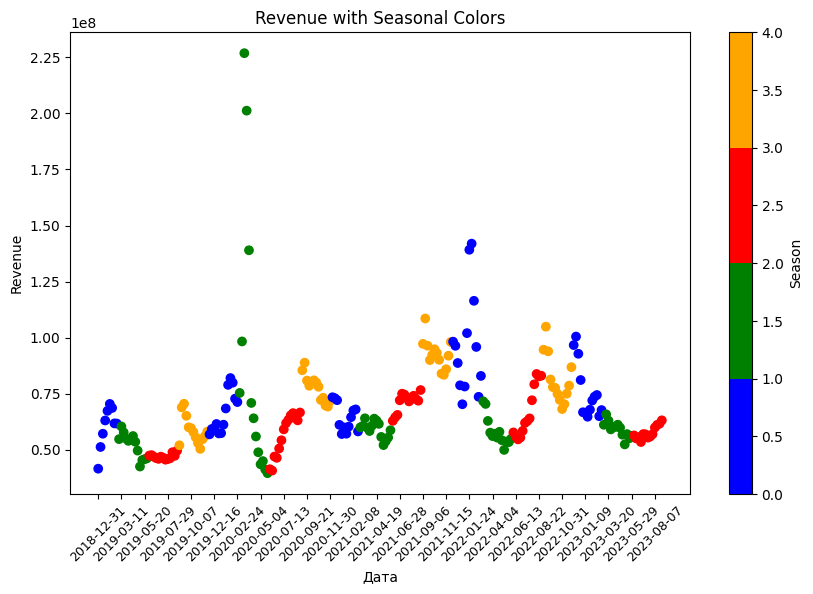

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# Create a colormap
colors = ['blue', 'green', 'red', 'orange']  # Winter, Spring, Summer, Autumn
cmap = plt.cm.colors.ListedColormap(colors)

# Plot the time series data with colors based on seasons
plt.figure(figsize=(10, 6))
plt.scatter(weeks, train['revenue'].values, c=train['season'], cmap=cmap, marker='o')
plt.colorbar(label='Season')
plt.xlabel('Дата')
plt.ylabel('Revenue')
plt.title('Revenue with Seasonal Colors')
plt.xticks(weeks[::10] , fontsize=9, rotation=45)
plt.show()

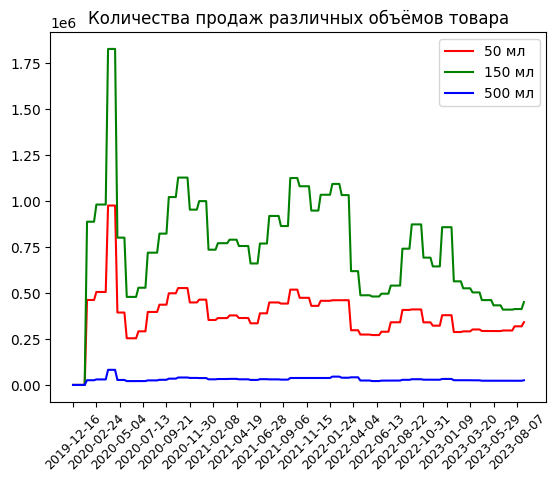

In [69]:
plt.plot(weeks[50:], train['50_q'].iloc[50:], c='r', label='50 мл')
plt.plot(weeks[50:], train['150_q'].iloc[50:], c='g', label='150 мл')
plt.plot(weeks[50:], train['500_q'].iloc[50:], c='b', label='500 мл')
plt.xticks(weeks[50::10] , fontsize=9, rotation=45)
plt.title('Количества продаж различных объёмов товара')
plt.legend()

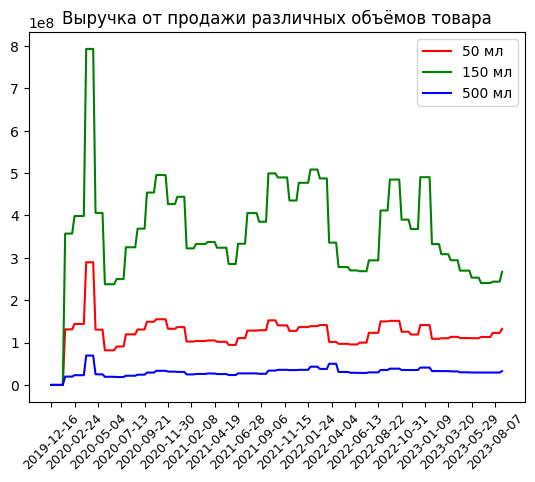

In [70]:
plt.plot(weeks[50:], train['50_r'].iloc[50:], c='r', label='50 мл')
plt.plot(weeks[50:], train['150_r'].iloc[50:], c='g', label='150 мл')
plt.plot(weeks[50:], train['500_r'].iloc[50:], c='b', label='500 мл')
plt.xticks(weeks[50::10] , fontsize=9, rotation=45)
plt.title('Выручка от продажи различных объёмов товара')
plt.legend()

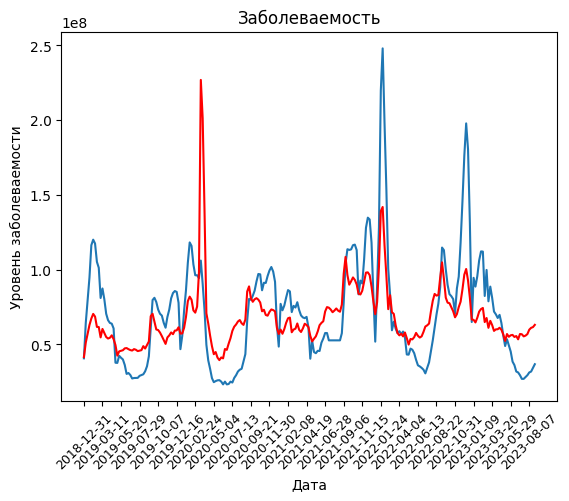

In [77]:
# plt.plot(weeks, train['disease_rate']*80)
# plt.plot(weeks, train['revenue'], c='r')
# plt.xticks(weeks[::10] , fontsize=9, rotation=45)
# plt.title('Заболеваемость')
# plt.xlabel('Дата')
# plt.ylabel('Уровень заболеваемости')
# plt.show();

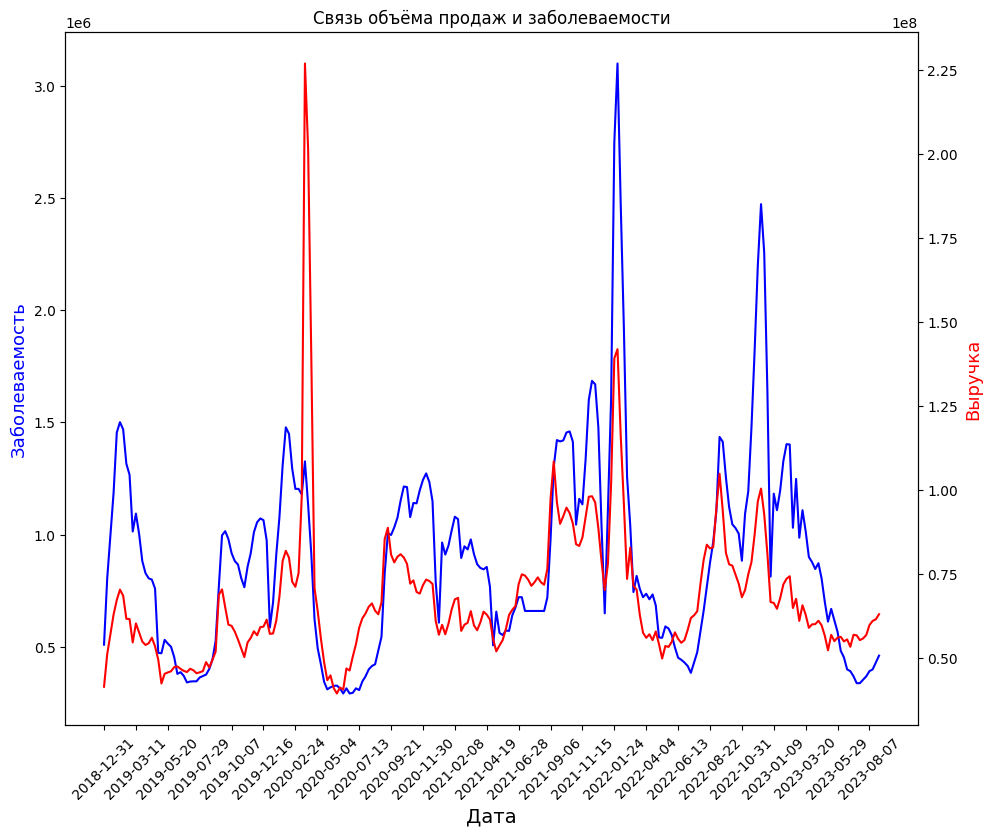

In [12]:
import matplotlib.pyplot as plt

#define colors to use
col1 = 'b'
col2 = 'r'

#define subplots
fig,ax = plt.subplots(figsize=(11, 9))

plt.title('Связь объёма продаж и заболеваемости')

#add first line to plot
ax.plot(weeks, train['disease_rate'] , color=col1)

#add x-axis label
ax.set_xlabel('Дата', fontsize= 14 )

#add y-axis label
ax.set_ylabel('Заболеваемость', color=col1, fontsize= 13 )

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx ()

#add second line to plot
ax2.plot(weeks, train['revenue'] , color=col2)

#add second y-axis label
ax2.set_ylabel('Выручка', color=col2, fontsize= 13 )

plt.xticks(weeks[::10] , fontsize=9, rotation=45)



xticks = weeks[::10]
xlabels = weeks[::10]
# ax2.set_xticks(xticks, labels=xlabels, rotation=45)
ax.set_xticks(xticks, labels=xlabels, rotation=45)

plt.show()

In [78]:
# plt.plot(weeks, train['revenue'])
# plt.xticks(weeks[::10] , fontsize=9, rotation=45)

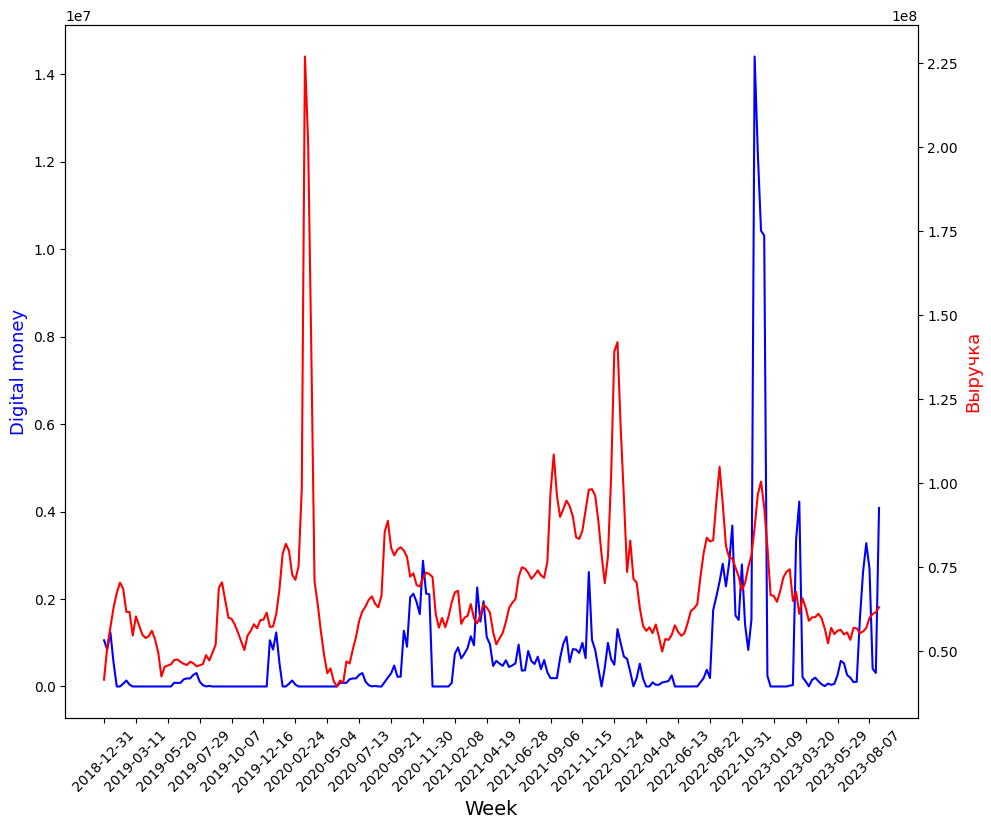

In [100]:
import matplotlib.pyplot as plt

#define colors to use
col1 = 'b'
col2 = 'r'

#define subplots
fig,ax = plt.subplots(figsize=(11, 9))

#add first line to plot
ax.plot(weeks, train['digital_money'] , color=col1)

#add x-axis label
ax.set_xlabel('Week', fontsize= 14 )

#add y-axis label
ax.set_ylabel('Digital money', color=col1, fontsize= 13 )

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx ()

#add second line to plot
ax2.plot(weeks, train['revenue'] , color=col2)

#add second y-axis label
ax2.set_ylabel('Выручка', color=col2, fontsize= 13 )

plt.xticks(weeks[::10] , fontsize=9, rotation=45)



xticks = weeks[::10]
xlabels = weeks[::10]
# ax2.set_xticks(xticks, labels=xlabels, rotation=45)
ax.set_xticks(xticks, labels=xlabels, rotation=45)

plt.show()

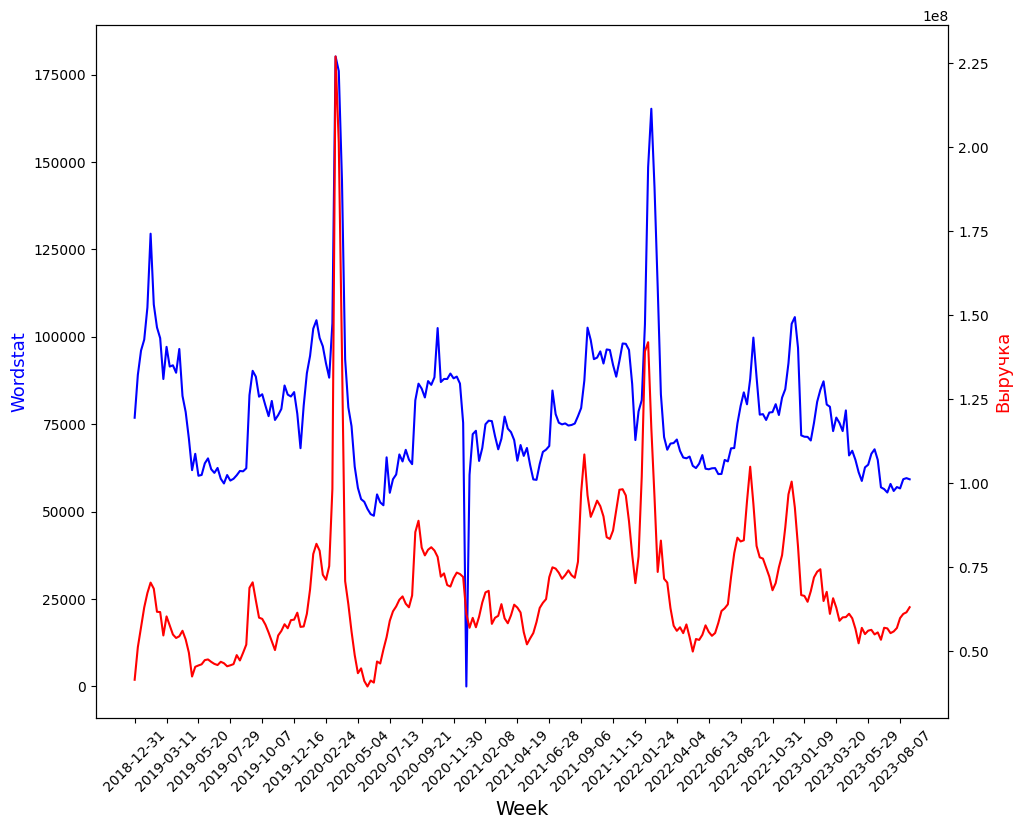

In [102]:
import matplotlib.pyplot as plt

#define colors to use
col1 = 'b'
col2 = 'r'

#define subplots
fig,ax = plt.subplots(figsize=(11, 9))

#add first line to plot
ax.plot(weeks, train['wordstat'] , color=col1)

#add x-axis label
ax.set_xlabel('Week', fontsize= 14 )

#add y-axis label
ax.set_ylabel('Wordstat', color=col1, fontsize= 13 )

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx ()

#add second line to plot
ax2.plot(weeks, train['revenue'] , color=col2)

#add second y-axis label
ax2.set_ylabel('Выручка', color=col2, fontsize= 13 )

plt.xticks(weeks[::10] , fontsize=9, rotation=45)



xticks = weeks[::10]
xlabels = weeks[::10]
# ax2.set_xticks(xticks, labels=xlabels, rotation=45)
ax.set_xticks(xticks, labels=xlabels, rotation=45)

plt.show()

In [97]:
train.head(3)

,week_number,year,week,week_beg,revenue,quantity,month,month_revenue,150_r,50_r,500_r,150_q,50_q,500_q,distribution,prescribes,disease_rate,price_index,generics_avg,generics_brands,1_video_rating,1_video_money,1_video_coverage_5,2_video_rating,2_video_money,2_video_coverage_5,3_video_rating,3_video_money,3_video_coverage_5,4_video_rating,4_video_money,4_video_coverage_5,total_video_rating,total_video_coverage_5,total_video_coverage_5.1,digital_money,radio_money,radio_times,wordstat,1_competitor_rating,1_competitor_coverage,1_competitor_money,1_competitor_digital,1_competitor_sponsorship_money,1_competitor_oon_money,1_competitor_radio_money,1_competitor_total,2_competitor_rating,2_competitor_coverage,2_competitor_money,2_competitor_digital,2_competitor_sponsorship_money,2_competitor_oon_money,2_competitor_radio_money,2_competitor_total,3_competitor_rating,3_competitor_coverage,3_competitor_money,3_competitor_digital,3_competitor_sponsorship_money,3_competitor_oon_money,3_competitor_radio_money,3_competitor_tv_reg,3_competitor_total,4_competitor_rating,4_competitor_coverage,4_competitor_money,4_competitor_digital,4_competitor_sponsorship_money,4_competitor_oon_money,4_competitor_radio_money,4_competitor_total,5_competitor_rating,5_competitor_coverage,5_competitor_money,5_competitor_digital,5_competitor_sponsorship_money,5_competitor_oon_money,5_competitor_radio_money,5_competitor_tv_reg,5_competitor_total,6_competitor_rating,6_competitor_coverage,6_competitor_money,6_competitor_digital,6_competitor_sponsorship_money,6_competitor_oon_money,6_competitor_radio_money,6_competitor_tv_reg,6_competitor_total,7_competitor_rating,7_competitor_coverage,7_competitor_money,7_competitor_digital,7_competitor_sponsorship_money,7_competitor_oon_money,7_competitor_radio_money,7_competitor_tv_reg,7_competitor_total,8_competitor_rating,8_competitor_coverage,8_competitor_money,8_competitor_digital,8_competitor_sponsorship_money,8_competitor_oon_money,8_competitor_radio_money,8_competitor_total,9_competitor_rating,9_competitor_coverage,9_competitor_money,9_competitor_digital,9_competitor_sponsorship_money,9_competitor_oon_money,9_competitor_radio_money,9_competitor_tv_reg,9_competitor_total,10_competitor_rating,10_competitor_coverage,10_competitor_money,10_competitor_digital,10_competitor_sponsorship_money,10_competitor_oon_money,10_competitor_radio_money,10_competitor_total,11_competitor_rating,11_competitor_coverage,11_competitor_money,11_competitor_digital,11_competitor_sponsorship_money,11_competitor_oon_money,11_competitor_radio_money,11_competitor_total,12_competitor_rating,12_competitor_coverage,12_competitor_money,12_competitor_digital,12_competitor_sponsorship_money,12_competitor_oon_money,12_competitor_radio_money,12_competitor_tv_reg,12_competitor_total,13_competitor_rating,13_competitor_coverage,13_competitor_money,13_competitor_digital,13_competitor_sponsorship_money,13_competitor_oon_money,13_competitor_radio_money,13_competitor_total,season,average_price
0,0,2019,1,15462144,4.153557e+07,114621.15,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.92107,99698.595433,508956.0,1.54132,0.0,0.0,0.000000,0.000000e+00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000,1057612.5,0.0,0.0,76854.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.606934e+06,1.606934e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.813979e+06,3.813979e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294.149196,23.6985,5.174524e+06,0.0,0.0,0.0,0.0,0.0,5.174524e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293.114917,21.9240,5.670257e+06,227587.5,0.0,0.0,0.0,5.897845e+06,191.587053,9.8385,1.645239e+06,3.033352e+06,0.0,0.0,0.0,7.155664e+06,1.183425e+07,207.903106,15.3615,9.085528e+06,0.0,0.0,0.0,0.0,9.085528e+06,0,362.372628
1,1,2019,2,15468192,5.122229e+07,141523.20,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.92107,99698.595433,804825.0,1.54132,0.0,0.0,7.295625,5.455